# ML lec 04 - multi-variable linear regression

여기서는 다변량 선형회귀분석을 실시합니다.


In [1]:
%pylab inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [3]:
# 이번 연습문제는 x1, x2, b를 개별 변수로 설정해서 trainig 시킨다.

x1_data = [1.0, 0.0, 3.0, 0.0, 5.0]
x2_data = [0.0, 2.0, 0.0, 4.0, 0.0]
y_data = [1.0, 2.0, 3.0, 4.0, 5.0]

# 파라미터 초기화 (구하고자 하는 대상 값임)
W1 = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
W2 = tf.Variable(tf.random_uniform([1], -1.0, 1.0))

# bias term 
b = tf.Variable(tf.random_uniform([1], -1.0, 1.0))

# 가설함수 정의
hypothesis = W1 * x1_data + W2 * x2_data + b

# cost function 정의
cost = tf.reduce_mean(tf.square(hypothesis - y_data))

# 제곱합 최소화 하기
a = tf.Variable(0.1)
optimizer = tf.train.GradientDescentOptimizer(a)
train = optimizer.minimize(cost)

# 변수 초기화
init = tf.initialize_all_variables()

# Graph 시작
sess = tf.Session()
sess.run(init)

for step in xrange(2001):
    sess.run(train)
    if step % 100 == 0:
        print step, sess.run(cost), sess.run(W1), sess.run(W2), sess.run(b)



0 0.49569 [ 1.14566898] [ 0.71541202] [ 0.25100219]
100 2.41899e-05 [ 0.99693495] [ 0.9963634] [ 0.01165962]
200 4.92204e-08 [ 0.99986178] [ 0.99983597] [ 0.00052598]
300 1.00147e-10 [ 0.99999386] [ 0.99999261] [  2.37413460e-05]
400 3.41061e-13 [ 0.99999964] [ 0.99999964] [  1.06774428e-06]
500 4.83169e-14 [ 0.99999994] [ 0.99999994] [  1.61753746e-07]
600 4.83169e-14 [ 0.99999994] [ 0.99999994] [  1.61753746e-07]
700 4.83169e-14 [ 0.99999994] [ 0.99999994] [  1.61753746e-07]
800 4.83169e-14 [ 0.99999994] [ 0.99999994] [  1.61753746e-07]
900 4.83169e-14 [ 0.99999994] [ 0.99999994] [  1.61753746e-07]
1000 4.83169e-14 [ 0.99999994] [ 0.99999994] [  1.61753746e-07]
1100 4.83169e-14 [ 0.99999994] [ 0.99999994] [  1.61753746e-07]
1200 4.83169e-14 [ 0.99999994] [ 0.99999994] [  1.61753746e-07]
1300 4.83169e-14 [ 0.99999994] [ 0.99999994] [  1.61753746e-07]
1400 4.83169e-14 [ 0.99999994] [ 0.99999994] [  1.61753746e-07]
1500 4.83169e-14 [ 0.99999994] [ 0.99999994] [  1.61753746e-07]
1600 4.8

(4, 5)
(3, 5)
(5,)
x [[ 1.  1.  1.  1.  1.]
 [ 1.  0.  3.  0.  5.]
 [ 0.  2.  0.  4.  0.]]
y [ 1.  2.  3.  4.  5.]
0 2.26857 [[ 1.09325695  0.75882864 -0.04311162]]
20 0.155319 [[ 0.93427777  0.75440556  0.7085945 ]]
40 0.0839778 [[ 0.68698496  0.81941104  0.78573257]]
60 0.0454051 [[ 0.50514656  0.86721122  0.8424471 ]]
80 0.0245497 [[ 0.37143907  0.90235913  0.88414985]]
100 0.0132735 [[ 0.27312273  0.92820376  0.91481429]]
120 0.00717673 [[ 0.2008297   0.94720757  0.93736213]]
140 0.0038803 [[ 0.14767197  0.96118122  0.95394182]]
160 0.00209801 [[ 0.10858463  0.97145617  0.96613294]]
180 0.00113435 [[ 0.07984329  0.97901142  0.97509724]]
200 0.000613322 [[ 0.05870956  0.98456693  0.98168874]]
220 0.00033161 [[ 0.04316967  0.98865193  0.98653561]]
240 0.000179294 [[ 0.03174304  0.99165565  0.99009949]]
260 9.69413e-05 [[ 0.02334094  0.9938643   0.99272007]]
280 5.24143e-05 [[ 0.01716282  0.99548841  0.99464703]]
300 2.83387e-05 [[ 0.01261996  0.99668252  0.99606389]]
320 1.5322e-05 [

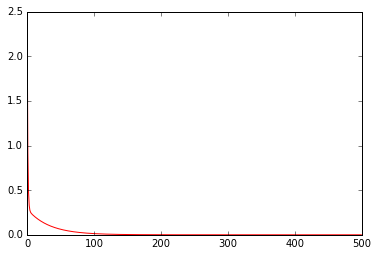

In [5]:

# 이번 연습문제는 x1, x2, b를 행렬로 취급한다.
"""
x_data = [[1, 1, 1, 1, 1],
    [1.0, 0.0, 3.0, 0.0, 5.0],
    [0.0, 2.0, 0.0, 4.0, 0.0]]

y_data = [1.0, 2.0, 3.0, 4.0, 5.0]

x_data = np.asarray(x_data)
print x_data.shape

"""
# XXX: unpack=True => mxn 행렬을 전치시켜서 nxm행렬로 데이터를 로딩한다.

# OK
#xy = np.loadtxt('train.txt', dtype='float32')
#xy = xy.T

# OK, bias가 포함되어 있다. (biax, x1, x2, y)
xy = np.loadtxt('train.txt', unpack=True, dtype='float32')

x_data = xy[0:-1]
y_data = xy[-1]

"""
(4, 5)
(3, 5)
(5,)
"""
print xy.shape
print x_data.shape
print y_data.shape

print 'x', x_data
print 'y', y_data
n = x_data.shape[0] # feature 수

# X,Y 에 대한 placeholder 선언
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# 파라미터 초기화 (구하고자 하는 대상 값임)
W = tf.Variable(tf.random_uniform([1, n], -1.0, 1.0))

# 가설함수 정의
hypothesis = tf.matmul(W, X)
#hypothesis = W * X

# cost function 정의
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# 제곱합 최소화 하기
# learning rate alpha 값을 다르게 하면서 cost J의 변화 정도를 
# 그래프로 확인해본다.
a = tf.Variable(0.05)
optimizer = tf.train.GradientDescentOptimizer(a)
train = optimizer.minimize(cost)

# 변수 초기화
init = tf.initialize_all_variables()

# Graph 시작
sess = tf.Session()
sess.run(init)

# cost function이 최소가 되는 파라미터 W를 찾는다.
step_val = []
cost_val = []
for step in xrange(500):
    sess.run(train, feed_dict = {X: x_data, Y: y_data})
    if step % 20 == 0:
        print step, sess.run(cost, feed_dict = {X: x_data, Y: y_data})  \
            , sess.run(W, feed_dict = {X: x_data, Y: y_data})
    
    step_val.append(step)
    cost_val.append(sess.run(cost, feed_dict = {X: x_data, Y: y_data}))

plt.plot(step_val, cost_val, 'r-')